In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

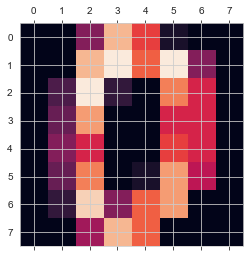

In [2]:
digits = datasets.load_digits()

plt.matshow(digits.data[0].reshape(8,8))

In [3]:
digits_data_DF = pd.DataFrame(digits.data, columns=['Feature '+str(i) for i in np.arange(1,65)])
digits_target_DF = pd.DataFrame({'target':digits.target})
digits_DF = pd.concat([digits_data_DF,digits_target_DF], axis=1)
digits_DF.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 56,Feature 57,Feature 58,Feature 59,Feature 60,Feature 61,Feature 62,Feature 63,Feature 64,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
digits.data.shape

# prints 1797, 64 -- we have 1797 samples and 64 features

(1797, 64)

In [5]:
len(digits.target)

# prints 1797 -- we have 1797 targets (one for each sample)

1797

In [6]:
digits.images.shape

(1797, 8, 8)

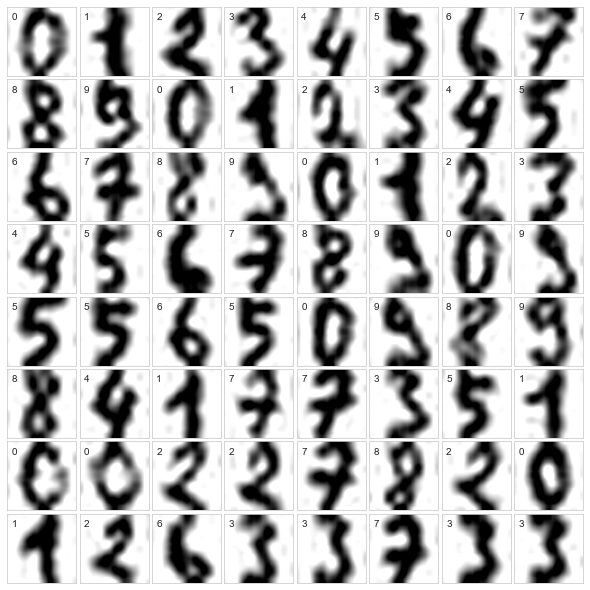

In [7]:
fig = plt.figure(figsize=(8,8))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    axis = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    axis.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='sinc')
    axis.text(0,1,str(digits.target[i]))

fig.savefig('digits_images.png')    
plt.show()

# Using Principal Component Analysis (PCA) to reduce dimensions

In [8]:
# creates a PCA model with 2-dimensional data
# svd_solver automatically set to 'auto', so trying to specify to use the 'full' method
pca = PCA(n_components=2, svd_solver='full')
digits_pca = pca.fit_transform(digits.data)
digits_pca.shape
# we reduced the number of features from 64 to 2!!!
# this should be MUCH easier to process for ML

(1797, 2)

In [9]:
digits_pca_DF = pd.DataFrame({'Principal component 1':digits_pca[:,0],'Principal component 2':digits_pca[:,1]})
pca_DF = pd.concat([digits_pca_DF,digits_target_DF], axis=1)
pca_DF.head()

,Principal component 1,Principal component 2,target
0,-1.259466,21.274883,0
1,7.957611,-20.768699,1
2,6.991923,-9.955986,2
3,-15.906105,3.332464,3
4,23.306867,4.269061,4


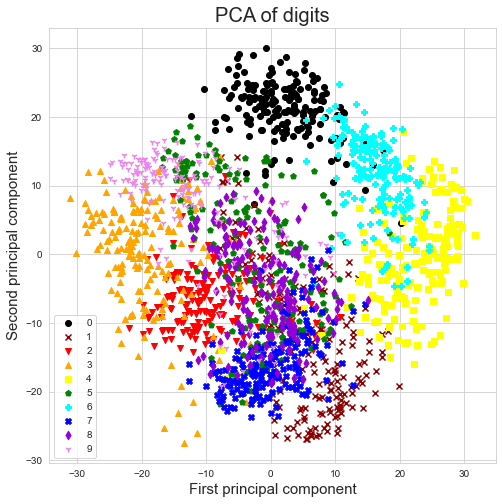

In [10]:
fig = plt.figure(figsize=(8,8))

colors = ['black','darkred','red','orange','yellow','green','cyan','blue','darkviolet','violet']
markers = ['o','x','v','^','s','p','P','X','d','1']

for i in range(10):
    x = digits_pca[:,0][digits.target == i]
    y = digits_pca[:,1][digits.target == i]
    plt.scatter(x, y, c=colors[i], marker=markers[i])
    
plt.legend(digits.target_names)
plt.xlabel('First principal component', fontsize=15)
plt.ylabel('Second principal component', fontsize=15)
plt.title('PCA of digits', fontsize=20)
plt.show()

# Showing the importance of applying StandardScaler before using PCA
Mean = 0, variance = 1

In [11]:
scaled_digits = StandardScaler().fit_transform(digits.data)
scaled_digits.shape

(1797, 64)

In [12]:
scaled_digits_pca = pca.fit_transform(scaled_digits)
scaled_digits_pca_DF = pd.DataFrame({'Principal component 1':scaled_digits_pca[:,0],'Principal component 2':scaled_digits_pca[:,1]})
scaled_pca_DF = pd.concat([scaled_digits_pca_DF,digits_target_DF], axis=1)
scaled_pca_DF.head()

,Principal component 1,Principal component 2,target
0,1.914214,-0.954502,0
1,0.588980,0.924636,1
2,1.302039,-0.317189,2
3,-3.020770,-0.868772,3
4,4.528949,-1.093480,4


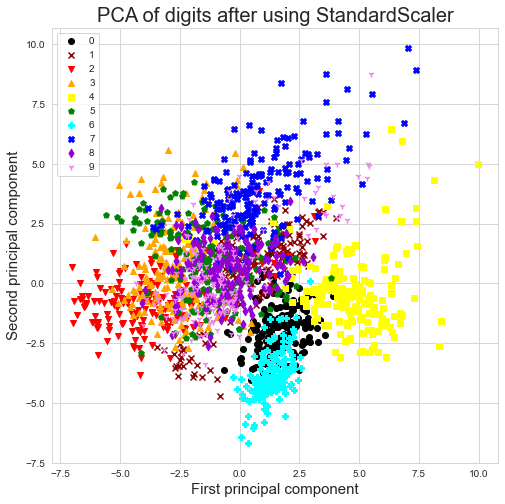

In [13]:
fig = plt.figure(figsize=(8,8))

for i in range(10):
    x = scaled_digits_pca[:,0][digits.target == i]
    y = scaled_digits_pca[:,1][digits.target == i]
    plt.scatter(x, y, c=colors[i], marker=markers[i])
    
plt.legend(digits.target_names)
plt.xlabel('First principal component', fontsize=15)
plt.ylabel('Second principal component', fontsize=15)
plt.title('PCA of digits after using StandardScaler', fontsize=20)
plt.show()

### As we can see from the two PCA graphs, these plots have drastically different PC values and behaviours. 
This method is clearly affected by the scale and variance of the data, and we MUST perform the StandardScaler step if we want to perform PCA on the data.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

## Checking how well PCA describes the dataset

In [14]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [15]:
perc = '{:.2%}'.format(pca.explained_variance_ratio_.sum())

print('The PCA data contains %s percent of the information contained in the original set.' %(perc))

The PCA data contains 21.59% percent of the information contained in the original set.


### This value is far from 85%, so reducing down to 2 dimensions does not really work here.

# Trying Randomized PCA 

In [16]:
r_pca = PCA(n_components=2, svd_solver='randomized')

scaled_r_digits_pca = r_pca.fit_transform(scaled_digits)
scaled_r_digits_pca_DF = pd.DataFrame({'Principal component 1':scaled_r_digits_pca[:,0],'Principal component 2':scaled_r_digits_pca[:,1]})
scaled_r_pca_DF = pd.concat([scaled_r_digits_pca_DF,digits_target_DF], axis=1)
scaled_r_pca_DF.head()

,Principal component 1,Principal component 2,target
0,1.914207,-0.954505,0
1,0.588986,0.924638,1
2,1.302024,-0.317201,2
3,-3.020765,-0.868783,3
4,4.528928,-1.093508,4


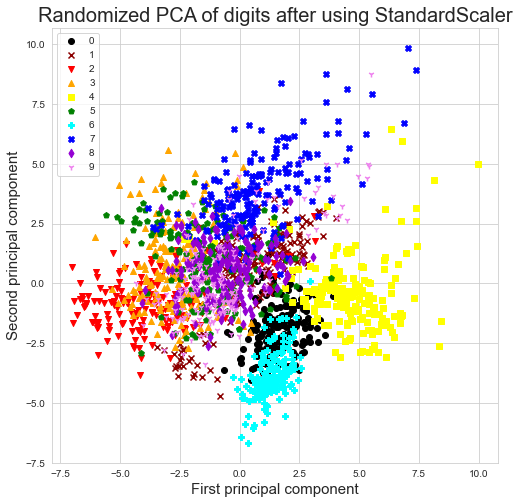

In [17]:
fig = plt.figure(figsize=(8,8))

for i in range(10):
    x = scaled_r_digits_pca[:,0][digits.target == i]
    y = scaled_r_digits_pca[:,1][digits.target == i]
    plt.scatter(x, y, c=colors[i], marker=markers[i])
    
plt.legend(digits.target_names)
plt.xlabel('First principal component', fontsize=15)
plt.ylabel('Second principal component', fontsize=15)
plt.title('Randomized PCA of digits after using StandardScaler', fontsize=20)
plt.show()

In [18]:
r_pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [19]:
perc = '{:.2%}'.format(r_pca.explained_variance_ratio_.sum())

print('The Randomized PCA data contains %s percent of the information contained in the original set.' %(perc))

The Randomized PCA data contains 21.59% percent of the information contained in the original set.


### As we can see here, using the randomized PCA method does not help to represent more of the information from the original data set.

# Split data into training and testing sets
With our scaled data we will split it up into different sets using `train_test_split()` and use our scaled data for this.

In [20]:
from sklearn.model_selection import train_test_split

In [41]:
myrand=100

x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(scaled_digits, digits.target, digits.images, test_size=0.3, random_state=myrand)

# Applying a model

In [22]:
from sklearn import cluster
from sklearn import metrics

In [42]:
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=myrand)
clf.fit(x_train)
clf.score(x_test,y_test)

-20679.80267007721

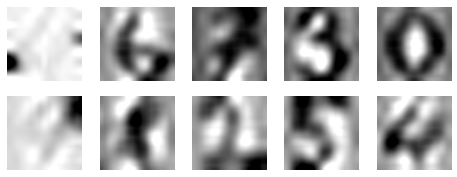

In [24]:
fig = plt.figure(figsize=(8, 3))

for i in range(10):
    axes = fig.add_subplot(2, 5, 1+i)
    axes.imshow(clf.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary, interpolation='sinc')
    plt.axis('off')
    
plt.show()

# Predicting and evaluating with that model

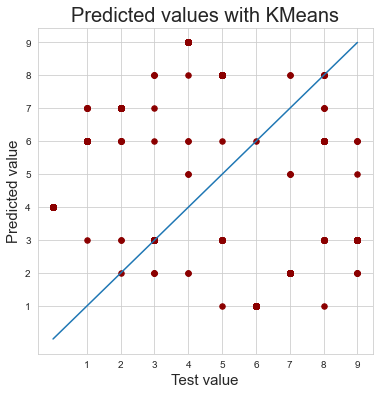

In [43]:
y_predict = clf.predict(x_test)

fig = plt.figure(figsize=(6,6))
plt.scatter(y_test,y_predict, s=30, c='darkred')
plt.plot(np.arange(10))
plt.xlabel('Test value', fontsize=15)
plt.xticks(np.arange(1,10))
plt.ylabel('Predicted value', fontsize=15)
plt.yticks(np.arange(1,10))
plt.title('Predicted values with KMeans', fontsize=20)

plt.show()

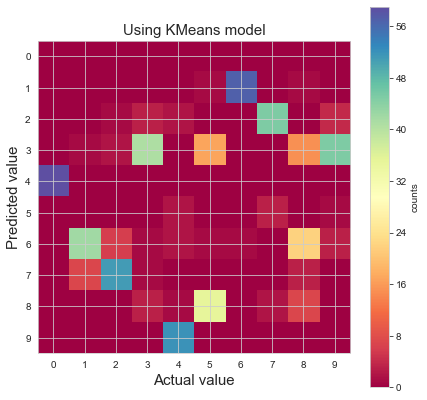

In [44]:
max_count = metrics.confusion_matrix(y_predict,y_test).max()

plt.figure(figsize=(7,7))
plt.imshow(metrics.confusion_matrix(y_predict,y_test),cmap='Spectral')

plt.xticks(np.arange(10))
plt.xlabel('Actual value', fontsize=15)
plt.yticks(np.arange(10))
plt.ylabel('Predicted value', fontsize=15)
plt.colorbar(ticks=np.arange(0,max_count+1,8), label='counts')
plt.title('Using KMeans model', fontsize=15)

plt.savefig('counts_KMeans')
plt.show()

In [27]:
np.diag(metrics.confusion_matrix(y_test,y_predict))

array([ 0,  0,  1, 41,  0,  0,  1,  0,  7,  0], dtype=int64)

In [28]:
right = np.diag(metrics.confusion_matrix(y_test,y_predict)).sum()
total = len(y_test)
percentage = '{:.2%}'.format(right/total)
print('Number of times the algorithm got it right: %0.0f, that\'s %s of the test sample data.' %(right,percentage))

Number of times the algorithm got it right: 50, that's 9.26% of the test sample data.


## Running through different random_states

In [29]:
correct_counts = []
total = len(y_test)

for i in range(1000):
    x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(scaled_digits, digits.target, digits.images, test_size=0.3, random_state=i)
    clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=i)
    clf.fit(x_train)
    y_predict = clf.predict(x_test)
    correct_counts.append((np.diag(metrics.confusion_matrix(y_test,y_predict)).sum())*100/total)
    i+=1

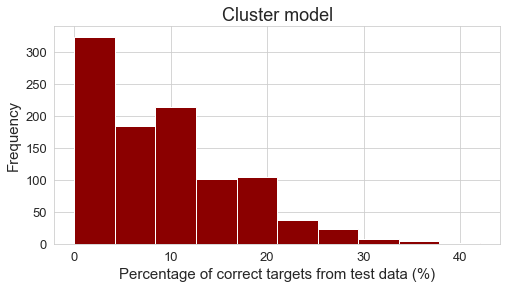

In [30]:
fig = plt.figure(figsize=(8,4))

plt.hist(correct_counts, color='darkred')
plt.xlabel('Percentage of correct targets from test data (%)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Cluster model', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
fig.savefig('KMeans_correct_counts.png')

# Trying another ML method: SVC

Following through the ML methods map: >50 samples -> predicting a category -> we have labeled data -> <100k samples --> Linear SVC

In [31]:
from sklearn import svm

In [32]:
# NOT using scaled data for this
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(scaled_digits, digits.target, digits.images, test_size=0.3, random_state=myrand)

# using the linear method for svc model
svc_model = svm.SVC(kernel='linear')
svc_model.fit(x_train,y_train)
svc_model.score(x_test,y_test)

0.9851851851851852

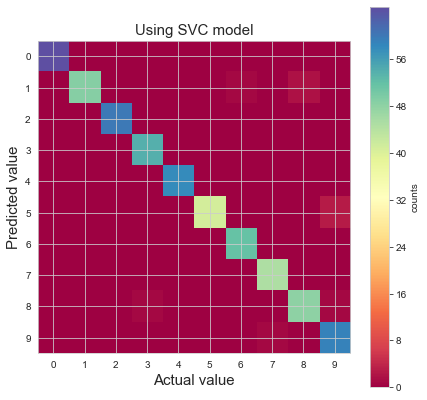

In [39]:
y_svc_pred = svc_model.predict(x_test)

plt.figure(figsize=(7,7))
plt.imshow(metrics.confusion_matrix(y_svc_pred,y_test),cmap='Spectral')

plt.xticks(np.arange(10))
plt.xlabel('Actual value', fontsize=15)
plt.yticks(np.arange(10))
plt.ylabel('Predicted value', fontsize=15)
plt.colorbar(ticks=np.arange(0,max_count+1,8), label='counts')
plt.title('Using SVC model', fontsize=15)

plt.savefig('counts_SVC.png')
plt.show()

In [34]:
np.diag(metrics.confusion_matrix(y_svc_pred,y_test)).sum()/total

0.9851851851851852

In [35]:
svc_correct_counts = []
total = len(y_test)

for i in range(1000):
    x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(scaled_digits, digits.target, digits.images, test_size=0.3, random_state=i)
    svc_model = svm.SVC(kernel='linear', random_state=i)
    svc_model.fit(x_train,y_train)
    y_svc_pred = svc_model.predict(x_test)
    svc_correct_counts.append(np.diag(metrics.confusion_matrix(y_svc_pred,y_test)).sum()*100/total)
    i += 1

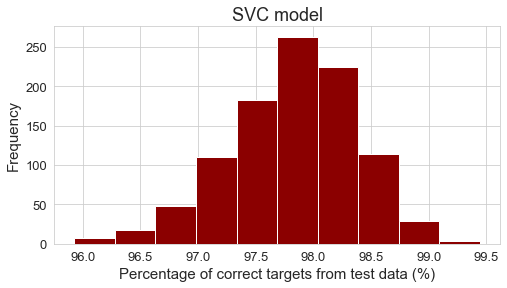

In [36]:
fig = plt.figure(figsize=(8,4))

plt.hist(svc_correct_counts, color='darkred')
plt.xlabel('Percentage of correct targets from test data (%)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('SVC model', fontsize=18)
plt.show()
fig.savefig('SVC_correct_counts.png')